In [ ]:
import pandas as pd
import numpy as np



# Load dataset
data = pd.read_csv("/Users/tommi/Desktop/Uni_documents/Data/dragon_data.csv", index_col=0, parse_dates=True, dayfirst=True)

# Display first few rows
data.head()


,SPY US Equity,URTH US Equity,TLT US Equity,IEF US Equity,XAU Curncy,GLD US Equity,BCOM Index,DBC US Equity,VIX Index,VIXM US Equity,XVZ US Equity
Dates,,,,,,,,,,,
2015-01-02,205.43,71.650,127.32,106.53,1188.39,114.08,103.8614,18.23,17.79,63.37,28.6001
2015-01-05,201.72,69.970,129.32,107.18,1204.86,115.80,103.8730,17.97,19.92,66.60,29.2499
2015-01-06,199.82,69.040,131.65,107.90,1218.58,117.12,104.0825,17.80,21.12,66.90,29.1000
2015-01-07,202.31,69.740,131.39,107.88,1211.41,116.43,103.5252,17.69,19.31,65.25,28.7900
2015-01-08,205.90,71.288,129.65,107.44,1208.79,115.94,103.6365,17.76,17.01,62.56,28.3499


In [25]:
# Convert prices to log returns
returns = np.log(data / data.shift(1)).dropna()

# Display the first few rows of returns
returns.head()


,SPY US Equity,URTH US Equity,TLT US Equity,IEF US Equity,XAU Curncy,GLD US Equity,BCOM Index,DBC US Equity,VIX Index,VIXM US Equity,XVZ US Equity
Dates,,,,,,,,,,,
2015-01-05,-0.018225,-0.023727,0.015586,0.006083,0.013764,0.014965,0.000112,-0.014365,0.113088,0.049714,0.022466
2015-01-06,-0.009464,-0.013381,0.017857,0.006695,0.011323,0.011334,0.002015,-0.009505,0.058496,0.004494,-0.005138
2015-01-07,0.012384,0.010088,-0.001977,-0.000185,-0.005901,-0.005909,-0.005369,-0.006199,-0.089597,-0.024973,-0.010710
2015-01-08,0.017589,0.021954,-0.013331,-0.004087,-0.002165,-0.004217,0.001075,0.003949,-0.126822,-0.042100,-0.015405
2015-01-09,-0.008046,-0.009585,0.010893,0.004921,0.011891,0.011321,-0.000137,-0.001691,0.031253,0.031302,0.005982


In [26]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

def run_regression(proxy, benchmark):
    """
    Runs OLS regression of proxy returns on benchmark returns.
    """
    X = returns[benchmark]
    y = returns[proxy]

    # Add a constant (intercept)
    X = sm.add_constant(X)

    # Fit regression model
    model = sm.OLS(y, X).fit()

    # Print regression summary
    print(f"\nRegression results for {proxy} on {benchmark}:\n")
    print(model.summary())

    # Scatter plot with trendline
    plt.figure(figsize=(6,4))
    plt.scatter(X[benchmark], y, alpha=0.5, label="Data Points")
    plt.plot(X[benchmark], model.predict(X), color='red', linewidth=2, label="Trendline")
    plt.xlabel(f"Returns of {benchmark}")
    plt.ylabel(f"Returns of {proxy}")
    plt.title(f"{proxy} vs. {benchmark}")
    plt.legend()
    plt.show()



Regression results for SPY US Equity on URTH US Equity:

                            OLS Regression Results                            
Dep. Variable:          SPY US Equity   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 3.672e+04
Date:                Sat, 08 Feb 2025   Prob (F-statistic):               0.00
Time:                        16:07:15   Log-Likelihood:                 11719.
No. Observations:                2635   AIC:                        -2.343e+04
Df Residuals:                    2633   BIC:                        -2.342e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

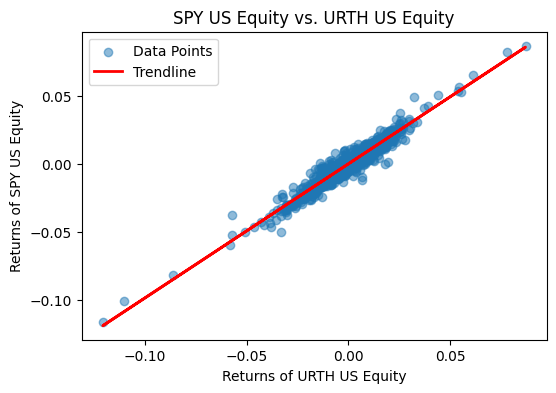


Regression results for TLT US Equity on IEF US Equity:

                            OLS Regression Results                            
Dep. Variable:          TLT US Equity   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                 1.398e+04
Date:                Sat, 08 Feb 2025   Prob (F-statistic):               0.00
Time:                        16:07:16   Log-Likelihood:                 10971.
No. Observations:                2635   AIC:                        -2.194e+04
Df Residuals:                    2633   BIC:                        -2.193e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

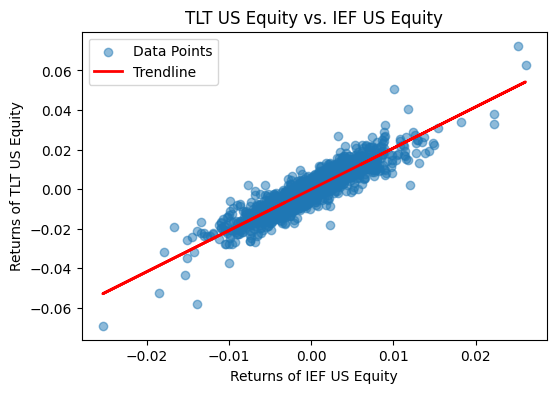


Regression results for GLD US Equity on XAU Curncy:

                            OLS Regression Results                            
Dep. Variable:          GLD US Equity   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                 6.839e+04
Date:                Sat, 08 Feb 2025   Prob (F-statistic):               0.00
Time:                        16:07:16   Log-Likelihood:                 13096.
No. Observations:                2635   AIC:                        -2.619e+04
Df Residuals:                    2633   BIC:                        -2.618e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

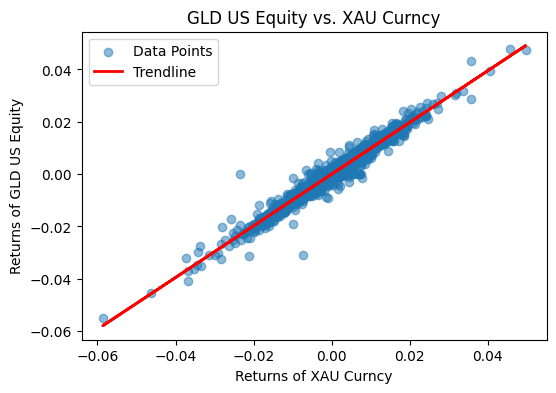


Regression results for DBC US Equity on BCOM Index:

                            OLS Regression Results                            
Dep. Variable:          DBC US Equity   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     8678.
Date:                Sat, 08 Feb 2025   Prob (F-statistic):               0.00
Time:                        16:07:16   Log-Likelihood:                 10035.
No. Observations:                2635   AIC:                        -2.007e+04
Df Residuals:                    2633   BIC:                        -2.005e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

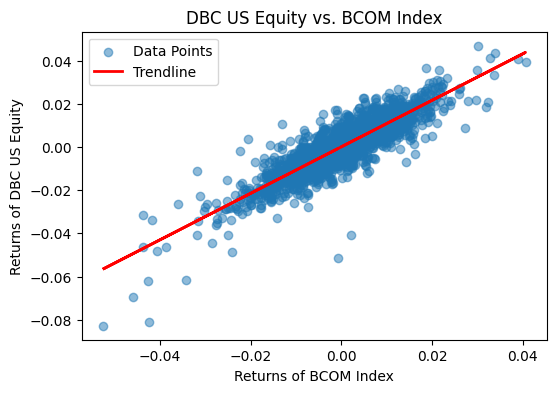


Regression results for VIXM US Equity on VIX Index:

                            OLS Regression Results                            
Dep. Variable:         VIXM US Equity   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     3746.
Date:                Sat, 08 Feb 2025   Prob (F-statistic):               0.00
Time:                        16:07:16   Log-Likelihood:                 7657.5
No. Observations:                2635   AIC:                        -1.531e+04
Df Residuals:                    2633   BIC:                        -1.530e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

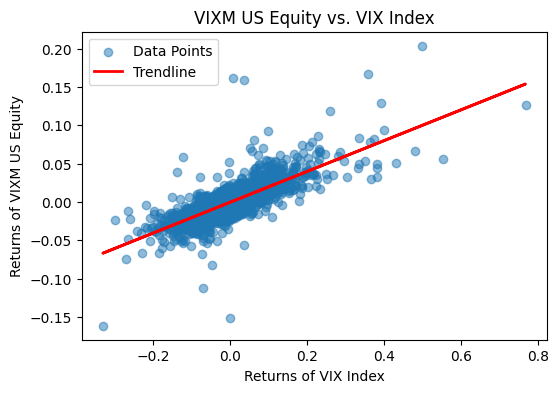

In [27]:
# Run regressions
run_regression("SPY US Equity", "URTH US Equity")  # Equities
run_regression("TLT US Equity", "IEF US Equity")  # Bonds
run_regression("GLD US Equity", "XAU Curncy")  # Gold
run_regression("DBC US Equity", "BCOM Index")  # Commodities
run_regression("VIXM US Equity", "VIX Index")  # Volatility
